<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM3/Deep%20Learning/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shiladitya 2348556 ⚛


0: 640x640 1 person, 1 bus, 1 train, 1 truck, 270.3ms
Speed: 8.3ms preprocess, 270.3ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
Confidence ---> 0.42
Class name --> Unknown
Confidence ---> 0.37
Class name --> bus
Confidence ---> 0.31
Class name --> Unknown
Confidence ---> 0.29
Class name --> Unknown


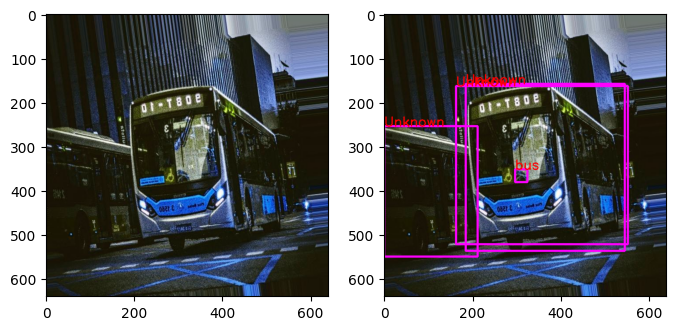

In [ ]:
import cv2
import math
import yaml
from ultralytics import YOLO
import matplotlib.pyplot as pt
with open("yolo.yaml", "r") as file:
    config = yaml.safe_load(file)
img = cv2.imread(r"C:\StrangerCodes\Jupyter\offline\yolo\train\pexels-thom-gonzalez-5036526_aug_0_463.jpg")
fig, ax = pt.subplots(nrows=1, ncols=2, figsize=(8,8))
ax[0].imshow(img)
model = YOLO("yolov8n.pt")
classNames = config['names']
results = model(img)
# Coordinates
for r in results:
    boxes = r.boxes
    for box in boxes:
        # Bounding box
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # Convert to int values
        # Put box in image
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)
        # Confidence
        confidence = math.ceil((box.conf[0] * 100)) / 100
        print("Confidence --->", confidence)
        # Class name
        cls = int(box.cls[0])
        class_name = classNames[cls] if 0 <= cls < len(classNames) else "Unknown"
        print("Class name -->", class_name)
        # Object details
        org = [x1, y1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        color = (255, 0, 0)
        thickness = 2
        cv2.putText(img, class_name, org, font, fontScale, color, thickness)
ax[1].imshow(img);